calculate band structure with nn TB model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get parameters from FP calculation
para = pd.read_csv('~/OneDrive - connect.hku.hk/capstone/tb_para.csv')

In [35]:
# define the function to calculate the band structure
def structure(a, e1, e2, t0, t1, t2, t11, t12, t22):

    # the typical cross section in the first Brillouin zone
    kx1 = np.linspace(0, 4*np.pi/(3*a), 1990)
    kx2 = np.linspace(4*np.pi/(3*a), np.pi/a, 990)
    kx3 = np.linspace(np.pi/a, 0, 1730)
    kx = np.concatenate((kx1, kx2, kx3))
    ky1 = np.linspace(0, 0, 1990)
    ky2 = np.linspace(0, np.pi/(np.sqrt(3)*a), 990)
    ky3 = np.linspace(np.pi/(np.sqrt(3)*a), 0, 1730)
    ky = np.concatenate((ky1, ky2, ky3))

    X = 1/2*kx*a
    Y = np.sqrt(3)/2*ky*a

    # build the Hamiltonian matrix
    h0 = 2*t0*(np.cos(2*X) + 2*np.cos(X)*np.cos(Y)) + e1
    h1 = - 2*np.sqrt(3)*t2*np.sin(X)*np.sin(Y) + 2*1j*t1*(np.sin(2*X) + np.sin(X)*np.cos(Y))
    h2 = 2*t2*(np.cos(2*X) - np.cos(X)*np.cos(Y)) + 2*np.sqrt(3)*1j*t1*np.cos(X)*np.sin(Y)
    h11 = 2*t11*np.cos(2*X) + (t11 + 3*t22)*np.cos(X)*np.cos(Y) + e2
    h22 = 2*t22*np.cos(2*X) + (t22 + 3*t11)*np.cos(X)*np.cos(Y) + e2
    h12 = np.sqrt(3)*(t22 - t11)*np.sin(X)*np.sin(Y) + 4*1j*t12*np.sin(X)*(np.cos(X) - np.cos(Y))

    ham = np.array([[h0, h1, h2], [np.conj(h1), h11, h12], [np.conj(h2), np.conj(h12), h22]])

    # calculate the eigenvalues
    # the eigenvalues are stored in the array 'eig'
    eig = np.array([0, 0, 0])
    for i in range(4710):
        eigenvalue = np.real(np.linalg.eigvals(ham[:,:,i]))
        eigenvalue = np.sort(eigenvalue)
        eig = np.vstack((eig, eigenvalue))
    eig = eig[1:,:]

    return eig

In [36]:
# calculate the band structure for differnet materials
bands = []
for i in range(12):
    band = structure(para['a'][i], para['e1'][i], para['e2'][i], para['t0'][i], para['t1'][i], para['t2'][i], para['t11'][i], para['t12'][i], para['t22'][i])
    bands.append(band)

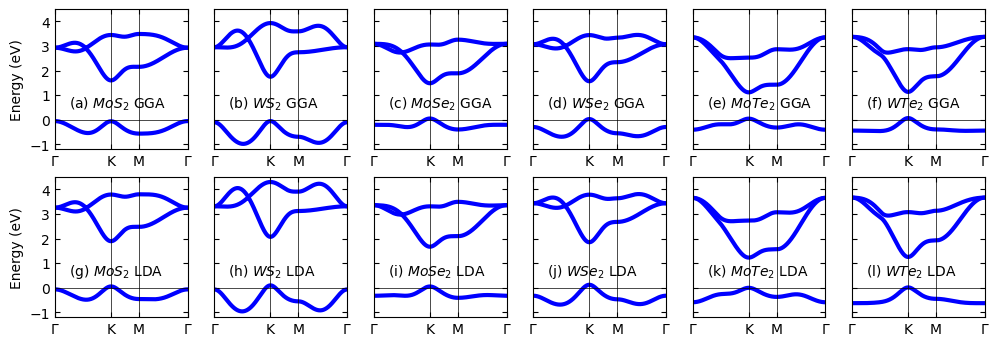

In [46]:
# plot the band structure
fig, ax = plt.subplots(2, 6, figsize=(12, 4))

ax[0,0].plot(bands[0], color='blue', linewidth=3)
ax[0,0].set_xlim(0, 1470)
ax[0,0].set_ylim(-1.2, 4.5)
ax[0,0].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
ax[0,0].set_yticks([-1, 0, 1, 2, 3, 4])
ax[0,0].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
ax[0,0].hlines([0], 0, 4710, colors='black', linewidth=0.5)
ax[0,0].tick_params(top=True, right=True, direction='in', labelleft=True, labelsize=10)
ax[0,0].set_ylabel('Energy (eV)', fontsize=10)

ax[1,0].plot(bands[6], color='blue', linewidth=3)
ax[1,0].set_xlim(0, 1470)
ax[1,0].set_ylim(-1.2, 4.5)
ax[1,0].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
ax[1,0].set_yticks([-1, 0, 1, 2, 3, 4])
ax[1,0].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
ax[1,0].hlines([0], 0, 4710, colors='black', linewidth=0.5)
ax[1,0].tick_params(top=True, right=True, direction='in', labelleft=True, labelsize=10)
ax[1,0].set_ylabel('Energy (eV)', fontsize=10)

for j in range(0, 2):
    for i in range(1, 6):
        ax[j, i].plot(bands[i+6*j], color='blue', linewidth=3)
        ax[j, i].set_xlim(0, 1470)
        ax[j, i].set_ylim(-1.2, 4.5)
        ax[j, i].set_xticks([0, 1990, 2980, 4710], ['$\Gamma$', 'K', 'M','$\Gamma$'])
        ax[j, i].set_yticks([-1, 0, 1, 2, 3, 4])
        ax[j, i].vlines([1990, 2980], -1.2, 4.5, colors='black', linewidth=0.5)
        ax[j, i].hlines([0], 0, 4710, colors='black', linewidth=0.5)
        ax[j, i].tick_params(top=True, right=True, direction='in', labelleft=False, labelsize=10)

# add labels
ax[0,0].text(500, 0.5, '(a) $MoS_2$ GGA', fontsize=10)
ax[0,1].text(500, 0.5, '(b) $WS_2$ GGA', fontsize=10)
ax[0,2].text(500, 0.5, '(c) $MoSe_2$ GGA', fontsize=10)
ax[0,3].text(500, 0.5, '(d) $WSe_2$ GGA', fontsize=10)
ax[0,4].text(500, 0.5, '(e) $MoTe_2$ GGA', fontsize=10)
ax[0,5].text(500, 0.5, '(f) $WTe_2$ GGA', fontsize=10)
ax[1,0].text(500, 0.5, '(g) $MoS_2$ LDA', fontsize=10)
ax[1,1].text(500, 0.5, '(h) $WS_2$ LDA', fontsize=10)
ax[1,2].text(500, 0.5, '(i) $MoSe_2$ LDA', fontsize=10)
ax[1,3].text(500, 0.5, '(j) $WSe_2$ LDA', fontsize=10)
ax[1,4].text(500, 0.5, '(k) $MoTe_2$ LDA', fontsize=10)
ax[1,5].text(500, 0.5, '(l) $WTe_2$ LDA', fontsize=10)

plt.show()

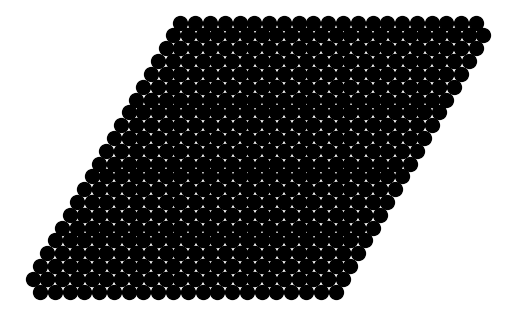

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice constants
a = 1.42  # Angstrom, carbon-carbon bond length
sqrt3 = np.sqrt(3)

# Define unit cell vectors
a1 = np.array([a, 0])
a2 = np.array([a/2, a*sqrt3/2])

# Define basis vectors for graphene
b1 = np.array([0, 0])
b2 = np.array([a/2, -a*sqrt3/2])

# Create points for the lattice
num_points = 10
points = []

for i in range(-num_points, num_points + 1):
    for j in range(-num_points, num_points + 1):
        point_a = i * a1 + j * a2
        point_b = point_a + b2
        points.append(point_a)
        points.append(point_b)

points = np.array(points)

# Plot the graphene lattice
plt.scatter(points[:, 0], points[:, 1], c='black', s=100)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

